In [33]:
# prompt: saya ingin memanggil data fifaWorldCup.csv yang telah saya unggah

import pandas as pd

# Ganti 'Prabowo.csv' dengan nama file yang sesuai jika berbeda
fifaWorldCup = pd.read_csv('fifaWorldCup.csv')

# Menampilkan beberapa baris pertama data untuk verifikasi
print(fifaWorldCup.head()) # Changed barcelona to fifaWorldCup

   conversation_id_str                      created_at  favorite_count  \
0  1902453621440086183  Wed Mar 19 20:14:23 +0000 2025             955   
1  1902488133456859538  Wed Mar 19 22:31:32 +0000 2025            1264   
2  1902329211139854736  Wed Mar 19 12:00:02 +0000 2025            1107   
3  1902023779250995457  Tue Mar 18 15:46:21 +0000 2025              37   
4  1901966821281997271  Tue Mar 18 12:00:01 +0000 2025            1633   

                                           full_text               id_str  \
0  FIFA should tell us if this Fede Valverde goal...  1902453621440086183   
1  Remember in FIFA when you could run away from ...  1902488133456859538   
2  Argentina remain the best country in world foo...  1902329211139854736   
3  Throwback to when FIFA released this video htt...  1902023779250995457   
4   Vincent Aboubakar. 🇨🇲 Can the striker help Ca...  1901966821281997271   

                                           image_url in_reply_to_screen_name  \
0    https:/

In [34]:
fifaWorldCup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      253 non-null    int64 
 1   created_at               253 non-null    object
 2   favorite_count           253 non-null    int64 
 3   full_text                252 non-null    object
 4   id_str                   253 non-null    int64 
 5   image_url                226 non-null    object
 6   in_reply_to_screen_name  5 non-null      object
 7   lang                     253 non-null    object
 8   location                 133 non-null    object
 9   quote_count              253 non-null    int64 
 10  reply_count              253 non-null    int64 
 11  retweet_count            253 non-null    int64 
 12  tweet_url                253 non-null    object
 13  user_id_str              253 non-null    int64 
 14  username                 253 non-null    o

In [35]:
fifaWorldCup["full_text"]

,full_text
0,FIFA should tell us if this Fede Valverde goal...
1,Remember in FIFA when you could run away from ...
2,Argentina remain the best country in world foo...
3,Throwback to when FIFA released this video htt...
4,Vincent Aboubakar. 🇨🇲 Can the striker help Ca...
...,...
248,L'article a été mis à jour avec les nouveaux S...
249,Nigeria will qualify for the 2026 FIFA WORLD C...
250,Check out the growing number of projects being...
251,Puma Rodríguez convocado! 🇺🇾 O nosso lateral-d...


In [36]:
#membuat function cleaning

import re
def clean(s):
    s = s.replace(r'<lb>', "\n")
    s = s.replace(r'<tab>', "\i")
    s = re.sub(r'<br */*>', "\n", s)
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    s = s.replace("&amp;", "&")
    # markdown urls
    s = re.sub(r'\(https*://[^\)]*\)', "", s)
    # normal urls
    s = re.sub(r'https*://[^\s]*', "", s)
    s = re.sub(r'_+', ' ', s)
    s = re.sub(r'"+', '"', s)
    return str(s)

In [37]:
#membuat sebuah variabel baru untuk menyimpan data hasil cleaning

fifaWorldCup["text_clean"] = ''

In [39]:
#Pembersihan text dari symbol
for i, row in fifaWorldCup.iterrows():
    # Check if the value is a string before cleaning
    if isinstance(row.full_text, str):
        fifaWorldCup.at[i, "text_clean"] = clean(row.full_text)
    else:
        # Handle non-string values (e.g., fill with empty string or NaN)
        fifaWorldCup.at[i, "text_clean"] = ''  # or fifaWorldCup.at[i, "text_clean"] = float('nan')

In [7]:
barcelona.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,text_clean
0,1902408349641040168,Wed Mar 19 17:14:30 +0000 2025,17574,🇵🇱 Two Poles who score a lot of goals. https:/...,1902408349641040168,https://pbs.twimg.com/media/Gma13jea8AQaLrn.jpg,NaN,en,BARÇA STORE,22,98,587,https://x.com/FCBarcelona/status/1902408349641...,96951800,FCBarcelona,🇵🇱 Two Poles who score a lot of goals.
1,1902253903099383953,Wed Mar 19 07:00:47 +0000 2025,28501,This is what Barcelona needs https://t.co/nElU...,1902253903099383953,https://pbs.twimg.com/media/GmYp1pdWMAAXdvp.jpg,NaN,en,Pain.𝕏 Headquarters,105,192,939,https://x.com/GBarca_/status/1902253903099383953,1681057761902116864,GBarca_,This is what Barcelona needs
2,1901619534185759187,Mon Mar 17 13:00:01 +0000 2025,36039,When life is even better after retirement. htt...,1901619534185759187,https://pbs.twimg.com/media/GmPl4SNXwAAPDb1.jpg,NaN,en,BARÇA STORE,14,137,1429,https://x.com/FCBarcelona/status/1901619534185...,96951800,FCBarcelona,When life is even better after retirement.
3,1901397428265525404,Sun Mar 16 22:17:27 +0000 2025,46684,THIS. IS. BARCELONA. https://t.co/1D9pAYRY0f,1901397428265525404,https://pbs.twimg.com/media/GmMe4WEbIAArfDo.jpg,NaN,en,NaN,97,410,2662,https://x.com/Hansiflickk/status/1901397428265...,1508160497341767680,Hansiflickk,THIS. IS. BARCELONA.
4,1902436360914702616,Wed Mar 19 19:05:48 +0000 2025,34312,Big games. Big wins. Big Barça. A thread https...,1902436360914702616,https://pbs.twimg.com/media/GmbPx2gW4AAAt-8.jpg,NaN,ht,BARÇA STORE,195,300,2132,https://x.com/FCBarcelona/status/1902436360914...,96951800,FCBarcelona,Big games. Big wins. Big Barça. A thread


In [40]:
fifaWorldCup[["full_text", "text_clean"]].head()

,full_text,text_clean
0,FIFA should tell us if this Fede Valverde goal...,FIFA should tell us if this Fede Valverde goal...
1,Remember in FIFA when you could run away from ...,Remember in FIFA when you could run away from ...
2,Argentina remain the best country in world foo...,Argentina remain the best country in world foo...
3,Throwback to when FIFA released this video htt...,Throwback to when FIFA released this video
4,Vincent Aboubakar. 🇨🇲 Can the striker help Ca...,Vincent Aboubakar. 🇨🇲 Can the striker help Ca...


In [41]:
pip install nltk

In [42]:
#tokenisasi
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize,word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [43]:
#Contoh tokenisasi
example_text = "Hello there, how are you doing today? The weather is great today. The sky is blue. python is awsome"
print(sent_tokenize(example_text))
print(word_tokenize(example_text))

['Hello there, how are you doing today?', 'The weather is great today.', 'The sky is blue.', 'python is awsome']
['Hello', 'there', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', 'today', '.', 'The', 'sky', 'is', 'blue', '.', 'python', 'is', 'awsome']


In [44]:
# prompt: saya ingin melakukan tokenisasi seperi syntax 23 untuk fifaWorldCup["text_clean"]

# Tokenisasi kata pada kolom 'text_clean'
fifaWorldCup['tokenized_text'] = fifaWorldCup['text_clean'].apply(lambda x: word_tokenize(x))

# Menampilkan beberapa baris pertama data dengan kolom tokenized_text
print(fifaWorldCup[['text_clean', 'tokenized_text']].head())

                                          text_clean  \
0  FIFA should tell us if this Fede Valverde goal...   
1  Remember in FIFA when you could run away from ...   
2  Argentina remain the best country in world foo...   
3        Throwback to when FIFA released this video    
4   Vincent Aboubakar. 🇨🇲 Can the striker help Ca...   

                                      tokenized_text  
0  [FIFA, should, tell, us, if, this, Fede, Valve...  
1  [Remember, in, FIFA, when, you, could, run, aw...  
2  [Argentina, remain, the, best, country, in, wo...  
3  [Throwback, to, when, FIFA, released, this, vi...  
4  [Vincent, Aboubakar, ., 🇨🇲, Can, the, striker,...  


In [45]:
fifaWorldCup["tokenized_text"].head()

,tokenized_text
0,"[FIFA, should, tell, us, if, this, Fede, Valve..."
1,"[Remember, in, FIFA, when, you, could, run, aw..."
2,"[Argentina, remain, the, best, country, in, wo..."
3,"[Throwback, to, when, FIFA, released, this, vi..."
4,"[Vincent, Aboubakar, ., 🇨🇲, Can, the, striker,..."


In [46]:
# prompt: saya ingin mengambil stopwords dalam bahasa indonesia

import nltk
nltk.download('stopwords')

# Mendapatkan daftar stopwords dalam bahasa Indonesia
from nltk.corpus import stopwords
stop_words_indonesia = stopwords.words('indonesian')

stop_words_indonesia

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [47]:
from nltk.corpus import stopwords
text = 'he is a good boy. he is very good in coding'
text = word_tokenize(text)
text_with_no_stopwords = [word for word in text if word not in stopwords.words('english')]
text_with_no_stopwords

['good', 'boy', '.', 'good', 'coding']

In [48]:
# prompt: saya ingin melakukan stopwords di fifaWorldCup["tokenized_text"]

# Mendapatkan daftar stopwords dalam bahasa Indonesia
stop_words_indonesia = stopwords.words('indonesian')

# Fungsi untuk menghapus stopwords dari list token
def remove_stopwords(token_list):
  return [word for word in token_list if word.lower() not in stop_words_indonesia]

# Menerapkan fungsi remove_stopwords ke kolom 'tokenized_text'
fifaWorldCup['tokenized_stopwords'] = fifaWorldCup['tokenized_text'].apply(remove_stopwords)

# Menampilkan beberapa baris pertama data dengan kolom tokenized_text_no_stopwords
fifaWorldCup[['tokenized_text', 'tokenized_stopwords']].head()

,tokenized_text,tokenized_stopwords
0,"[FIFA, should, tell, us, if, this, Fede, Valve...","[FIFA, should, tell, us, if, this, Fede, Valve..."
1,"[Remember, in, FIFA, when, you, could, run, aw...","[Remember, in, FIFA, when, you, could, run, aw..."
2,"[Argentina, remain, the, best, country, in, wo...","[Argentina, remain, the, best, country, in, wo..."
3,"[Throwback, to, when, FIFA, released, this, vi...","[Throwback, to, when, FIFA, released, this, vi..."
4,"[Vincent, Aboubakar, ., 🇨🇲, Can, the, striker,...","[Vincent, Aboubakar, ., 🇨🇲, Can, the, striker,..."


In [49]:
#Contoh Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()    ## Creating an object for porterstemmer
example_words = ['earn',"earning","earned","earns"]  ##Example words
for w in example_words:
    print(ps.stem(w))

earn
earn
earn
earn


In [50]:
# prompt: saya ingin melakukan stemming pada fifaWorldCup["tokenized_stopwords"] dalam bahasa indonesia

!pip install Sastrawi

In [51]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Buat objek stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada list token
def stemming_sastrawi(token_list):
  return [stemmer.stem(word) for word in token_list]

# Terapkan fungsi stemming_sastrawi ke kolom 'tokenized_stopwords'
fifaWorldCup['stemmed_words'] = fifaWorldCup['tokenized_stopwords'].apply(stemming_sastrawi)

# Menampilkan beberapa baris pertama data dengan kolom stemmed_words
fifaWorldCup[['tokenized_stopwords', 'stemmed_words']]

,tokenized_stopwords,stemmed_words
0,"[FIFA, should, tell, us, if, this, Fede, Valve...","[fifa, should, tell, us, if, this, fede, valve..."
1,"[Remember, in, FIFA, when, you, could, run, aw...","[remember, in, fifa, when, you, could, run, aw..."
2,"[Argentina, remain, the, best, country, in, wo...","[argentina, remain, the, best, country, in, wo..."
3,"[Throwback, to, when, FIFA, released, this, vi...","[throwback, to, when, fifa, released, this, vi..."
4,"[Vincent, Aboubakar, ., 🇨🇲, Can, the, striker,...","[vincent, aboubakar, , , can, the, striker, he..."
...,...,...
248,"[L'article, a, été, mis, à, jour, avec, les, n...","[l article, a, t, mis, , jour, avec, les, nouv..."
249,"[Nigeria, will, qualify, for, the, 2026, FIFA,...","[nigeria, will, qualify, for, the, 2026, fifa,..."
250,"[Check, out, the, growing, number, of, project...","[check, out, the, growing, number, of, project..."
251,"[Puma, Rodríguez, convocado, !, 🇺🇾, O, nosso, ...","[puma, rodr guez, convocado, , , o, nosso, lat..."


In [52]:
# prompt: berikan saya syntax untuk membuat analisis sentimen untuk variabel stemmed_words

!pip install vaderSentiment

In [53]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inisialisasi objek SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text_list):
    # Gabungkan list token menjadi satu string
    text = " ".join(text_list)

    # Lakukan analisis sentimen
    scores = analyzer.polarity_scores(text)

    # Kembalikan nilai compound score
    return scores['compound']

# Terapkan fungsi analyze_sentiment ke kolom 'stemmed_words'
fifaWorldCup['sentiment_score'] = fifaWorldCup['stemmed_words'].apply(analyze_sentiment)

In [54]:
# Menampilkan beberapa baris pertama data dengan kolom sentiment_score
print(fifaWorldCup[['stemmed_words', 'sentiment_score']].head())

                                       stemmed_words  sentiment_score
0  [fifa, should, tell, us, if, this, fede, valve...          -0.4717
1  [remember, in, fifa, when, you, could, run, aw...           0.4404
2  [argentina, remain, the, best, country, in, wo...           0.6369
3  [throwback, to, when, fifa, released, this, vi...           0.0000
4  [vincent, aboubakar, , , can, the, striker, he...           0.4019


In [55]:
# Membuat label setiap komentar

# Fungsi untuk menentukan label sentimen berdasarkan sentiment_score
def label_sentiment(score):
    if score < 0:
        return 'negatif'
    elif score == 0:
        return 'netral'
    else:
        return 'positif'

# Buat kolom baru 'sentiment_label' berdasarkan kolom 'sentiment_score'
fifaWorldCup['sentiment_label'] = fifaWorldCup['sentiment_score'].apply(label_sentiment)

# Menampilkan beberapa baris pertama data dengan kolom sentiment_label
print(fifaWorldCup[['stemmed_words', 'sentiment_score', 'sentiment_label']].head())

                                       stemmed_words  sentiment_score  \
0  [fifa, should, tell, us, if, this, fede, valve...          -0.4717   
1  [remember, in, fifa, when, you, could, run, aw...           0.4404   
2  [argentina, remain, the, best, country, in, wo...           0.6369   
3  [throwback, to, when, fifa, released, this, vi...           0.0000   
4  [vincent, aboubakar, , , can, the, striker, he...           0.4019   

  sentiment_label  
0         negatif  
1         positif  
2         positif  
3          netral  
4         positif  


In [56]:
!pip install seaborn

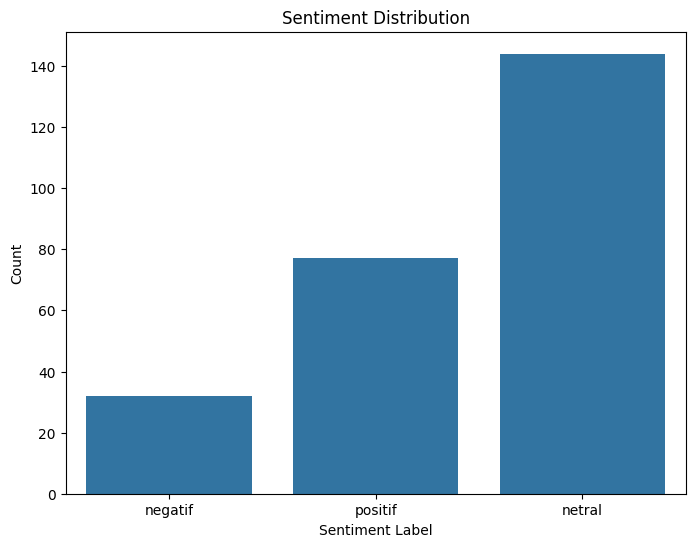

In [57]:
#Membuat grafik plot
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=fifaWorldCup)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

In [58]:
# prompt: Buat word cloud dari setiap kategori

!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

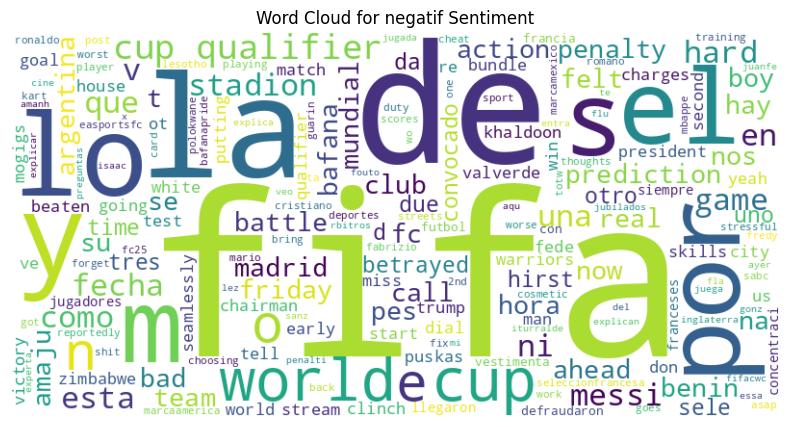

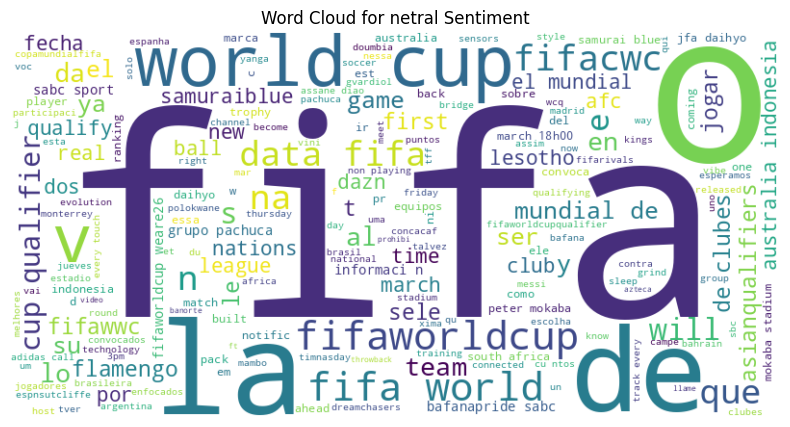

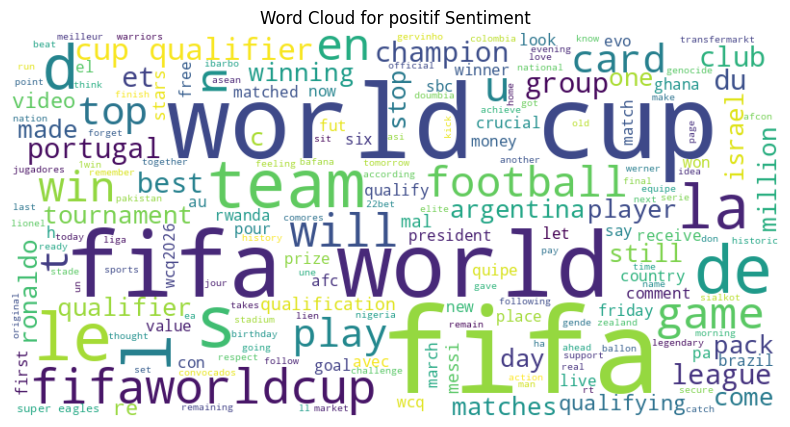

In [59]:
# Group data by sentiment label
sentiment_groups = fifaWorldCup.groupby('sentiment_label')

# Create word clouds for each sentiment category
for sentiment, group in sentiment_groups:
    # Combine all stemmed words in the group
    all_words = ' '.join([' '.join(words) for words in group['stemmed_words']])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()